Enter the number of nodes: 7
Enter node 1: wa
Enter node 2: nt
Enter node 3: sa
Enter node 4: q
Enter node 5: nsw
Enter node 6: v
Enter node 7: t
Enter the number of edges: 8
Enter edge 1 (format: node1 node2): wa nt
Enter edge 2 (format: node1 node2): nt q
Enter edge 3 (format: node1 node2): wa sa
Enter edge 4 (format: node1 node2): nt sa
Enter edge 5 (format: node1 node2): sa v
Enter edge 6 (format: node1 node2): sa nsw
Enter edge 7 (format: node1 node2): v nsw
Enter edge 8 (format: node1 node2): q nsw
Enter the number of colors: 3
Enter color 1: red
Enter color 2: green
Enter color 3: blue


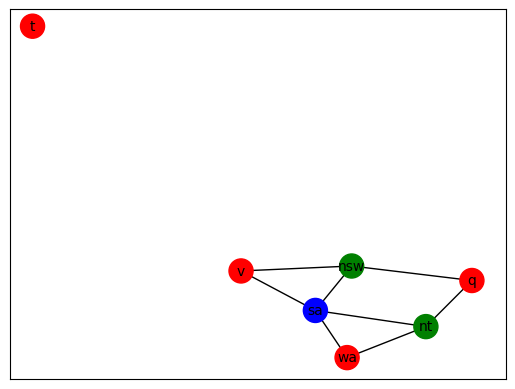

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

num_nodes = int(input("Enter the number of nodes: "))
nodes = []
for i in range(num_nodes):
    node = input(f"Enter node {i+1}: ")
    nodes.append(node)

num_edges = int(input("Enter the number of edges: "))
edges = []
for i in range(num_edges):
    edge = input(f"Enter edge {i+1} (format: node1 node2): ").split()
    edges.append(tuple(edge))

num_colors = int(input("Enter the number of colors: "))
colors = []
for i in range(num_colors):
    color = input(f"Enter color {i+1}: ")
    colors.append(color)

G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

def is_safe(node, color, colored_nodes):
    for neighbor in G.neighbors(node):
        if neighbor in colored_nodes and colored_nodes[neighbor] == color:
            return False
    return True

def color_map():
    colored_nodes = {}
    for node in G.nodes():
        for color in colors:
            if is_safe(node, color, colored_nodes):
                colored_nodes[node] = color
                break
        else:
            return None
    return colored_nodes

colored_nodes = color_map()

if colored_nodes is None:
    print("Insufficient colors to color the graph.")
else:
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos, node_color=[colored_nodes[node] for node in G.nodes()])
    nx.draw_networkx_edges(G, pos, edge_color='black')
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.show()